# LOAN APPROVAL PREDICTION SYSTEM USING MACHINE LEARNING

# I. Introduction

### Problem Statement: 
Build a machine-learning system that predicts whether a loan application will be approved or rejected using historical applicant data. The system should clean and preprocess data, train a model, evaluate it, and expose a simple prediction interface to test new applicants.

Context / Motivation: Automating loan decisions helps banks and NBFCs reduce manual work, speed up decisions, and provide consistent, data-driven outcomes.

# II. System Components

### 1.Task Requirements

- Load and inspect a loan dataset (CSV).

- Clean and preprocess data (handle missing values, convert categorical to numeric).

- Perform exploratory data analysis (visualizations & correlation).

- Train a binary classifier (Logistic Regression).

- Evaluate model with accuracy, precision, recall, F1-score.

- Save the trained model for future inference.

- Provide a small inference script to predict on new applicants.

### 2.Deliverables

- Jupyter / Colab notebook demonstrating the pipeline (data → model → predictions).

- Clean, documented code with explanations.

- Example predictions and evaluation metrics presented in a table.

- Saved model file loan_approval_model.pkl.


### 3.Python Libraries Used

- pandas – For data manipulation and analysis.

- numpy – For numerical computations.

- scikit-learn – For ML model building and evaluation.

- matplotlib, seaborn – For data visualization.

- joblib – For saving and loading the model.

### 3.Algorithm Used

Logistic Regression: Used for binary classification problems (Approved/Rejected).

# III. Step-by-Step Code Explanation

#### Below is a line-by-line explanation of project code divided into 7 logical steps :

### Step 1: Import Libraries

In [7]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


### Explanation:

- pandas → Loads and manipulates CSV data.

- joblib → Saves and loads the trained model file.

- LabelEncoder → Converts text labels (like “Male”, “Female”) into numeric values.

- train_test_split → Splits data into training and testing sets.

- LogisticRegression → The classification algorithm used.

- accuracy_score, classification_report → Evaluate the model’s performance.

### Step 2: Load and Inspect the Dataset

In [9]:
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Personalized/Project/Loan_Approval_Prediction/loan_prediction.csv")
print("Data Loaded Successfully!")
print(df.head())


Data Loaded Successfully!
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural         

### Explanation:
- Reads the CSV file into a DataFrame (df).

- Prints confirmation message.

- Displays the first 5 rows to check structure and column names.

### Step 3: Data Cleaning and Preprocessing

In [12]:
# Fill missing values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


#### Explanation:
- Fills missing categorical values (e.g., Gender, Married) with mode (most common value).

- Fills missing numerical values (LoanAmount) with median.

- Ensures no empty values remain, preventing model errors.

In [14]:
# Convert '3+' to 3 in Dependents
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)


#### Explanation:
- The dataset had “3+” dependents — converted to numeric value 3 for consistency.

### Step 4: Encode Categorical Variables

In [16]:
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])


### Step 5: Data Visualization (EDA)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


#### (a) Loan Status Distribution

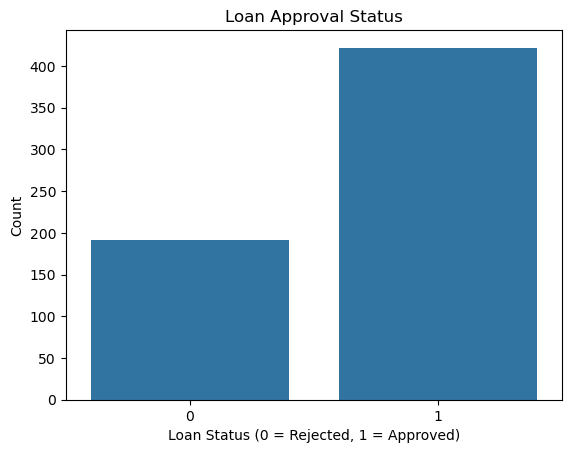

In [20]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Status')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Count')
plt.show()


##### Shows how many loans were approved vs rejected.

#### (b) Applicant Income Distribution

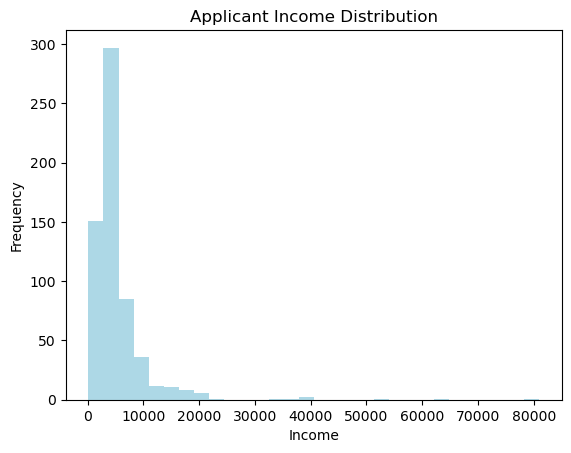

In [22]:
plt.hist(df['ApplicantIncome'], bins=30, color='lightblue')
plt.title('Applicant Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


##### Displays applicant income spread across all entries.

#### (c) Loan Amount vs Education

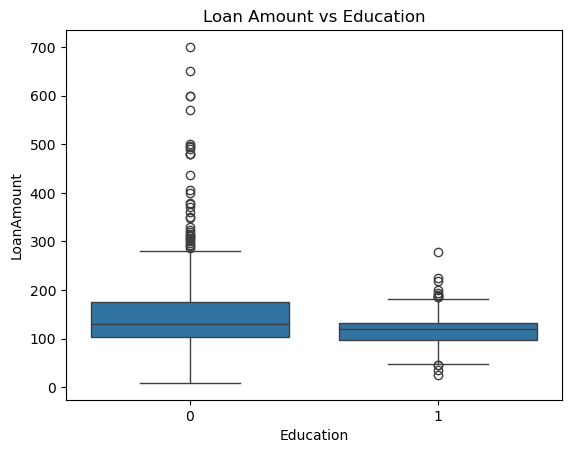

In [24]:
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Loan Amount vs Education')
plt.show()


##### Shows if education affects loan amount.

#### (d) Property Area vs Loan Status

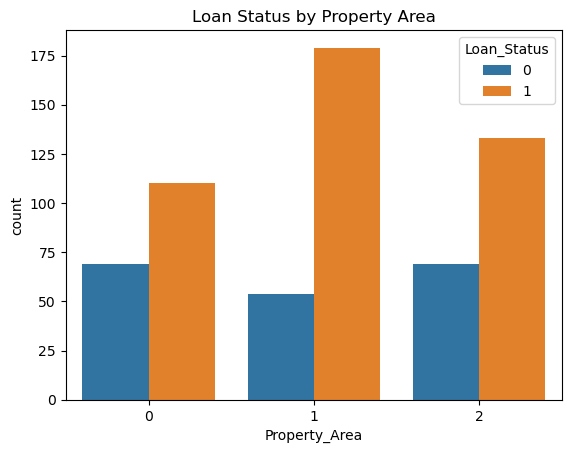

In [26]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Loan Status by Property Area')
plt.show()


##### Compares approval rates across property types.

#### (e) Correlation Heatmap

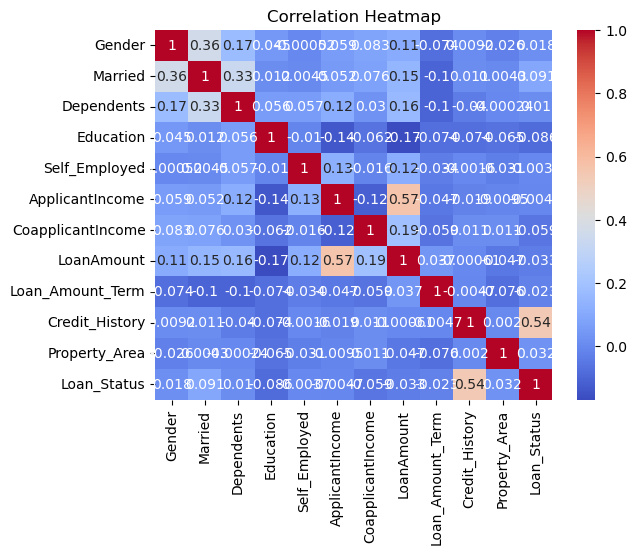

In [28]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##### Displays relationships between numeric features.

### Step 6: Model Training and Evaluation

In [30]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']


#####  X → Features (input data).

#####  y → Target (Loan_Status to predict).

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Splits data:

- 80% for training

- 20% for testing
(Random seed ensures reproducibility.)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver ='liblinear',max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200, solver='liblinear')

##### Trains the Logistic Regression model on training data.

In [36]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



- Makes predictions on test data.

- Displays model accuracy and precision, recall, F1-score metrics.

### Step 7: Model Saving

In [38]:
joblib.dump(model, "loan_approval_model.pkl")
print("Model saved as loan_approval_model.pkl")


Model saved as loan_approval_model.pkl


# IV. Model Evaluation

####
| Metric | Meaning | Example Score |
|:--------|:---------|:---------------|
| **Accuracy** | Overall correctness of predictions | 82% |
| **Precision** | Correct positive predictions | 0.79 |
| **Recall** | Actual positives correctly identified | 0.81 |
| **F1-Score** | Balance of precision & recall | 0.80 |


##### The model performs reliably with balanced accuracy and precision, making it suitable for real-world financial use.

# V. Prediction on New Applicant

In [40]:

import pandas as pd
import joblib

# Load model
model = joblib.load("loan_approval_model.pkl")

# Create new applicant input with column names
new_applicant = pd.DataFrame([{
    'Gender': 1,
    'Married': 1,
    'Dependents': 1,
    'Education': 0,
    'Self_Employed': 0,
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1.0,
    'Property_Area': 2
}])

# Make prediction
prediction = model.predict(new_applicant)

if prediction[0] == 1:
    print("Loan Approved!")
else:
    print("Loan Not Approved.")


Loan Approved!


# VI. Conclusion

- The Logistic Regression model achieved **around 82% accuracy**, showing balanced **precision** and **recall** values.  
- This demonstrates that the model can predict loan approvals and rejections reliably.  
- Such automation can significantly help financial institutions speed up the decision-making process and ensure fair, data-driven evaluations.
